## Cloning quasars

Let's import data from DR7 quasars observation.

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data 

In [1]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

In [2]:
data.dtype

dtype([('sdssID', 'S14'), ('RA', '<f8'), ('dec', '<f8'), ('redshift', '<f4'), ('mag_u', '<f4'), ('err_u', '<f4'), ('mag_g', '<f4'), ('err_g', '<f4'), ('mag_r', '<f4'), ('err_r', '<f4'), ('mag_i', '<f4'), ('err_i', '<f4'), ('mag_z', '<f4'), ('err_z', '<f4'), ('mag_J', '<f4'), ('err_J', '<f4'), ('mag_H', '<f4'), ('err_H', '<f4'), ('mag_K', '<f4'), ('err_K', '<f4'), ('specobjid', '<i8')])

Text(0, 0.5, 'quasar density')

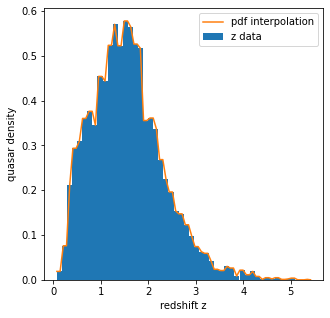

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(5,5))

#representing data with a histogram
cont, bins = np.histogram(z, bins = 50, density=True)
ax.hist(z, bins=bins, density=True, label='z data')
fmax = np.max(cont) #finding the maximum of the pdf

#with this I interpolate the points of the histogram to have a continuous function
from scipy.stats import rv_histogram
function = rv_histogram((cont, bins))

xaxis = np.linspace(np.min(z), np.max(z), 80)
ax.plot(xaxis,function.pdf(xaxis), c='tab:orange', label='pdf interpolation')
ax.legend()

ax.set_xlabel('redshift z')
ax.set_ylabel('quasar density')

### Cloning with scipy functions

Text(0.5, 1.0, 'Scipy method: cloned pdf')

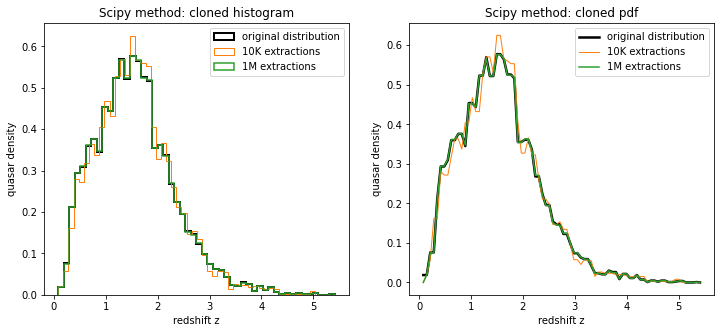

In [4]:
#extracting data from the interpolated pdf (scipy method)
good_x  = function.rvs(size=10000)
good_x2 = function.rvs(size=1000000)

#interpolated pdf from the new extractions
f1 = rv_histogram(np.histogram(good_x, density=True, bins=50))
f2 = rv_histogram(np.histogram(good_x2, density=True, bins=50))

#plotting the results
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].hist(z, bins=50, density=True, histtype='step', color='black', lw=2, label ='original distribution')
ax[0].hist(good_x, bins = 50, density=True, histtype='step', lw=1, color='tab:orange', label = '10K extractions')
ax[0].hist(good_x2, bins = 50, density=True, histtype='step', lw=1.5, color='tab:green', label = '1M extractions')
ax[0].legend()
ax[0].set_xlabel('redshift z')
ax[0].set_ylabel('quasar density')
ax[0].set_title('Scipy method: cloned histogram')

ax[1].plot(xaxis, function.pdf(xaxis), color='black', lw=2.5, label ='original distribution')
ax[1].plot(xaxis, f1.pdf(xaxis), color='tab:orange', lw=1, label = '10K extractions')
ax[1].plot(xaxis, f2.pdf(xaxis), color='tab:green', lw=1.5, label = '1M extractions')
ax[1].legend()
ax[1].set_xlabel('redshift z')
ax[1].set_ylabel('quasar density')
ax[1].set_title('Scipy method: cloned pdf')

### Cloning with the (manual) rejection method

The accepted points represent the  32 % of the extractions
The accepted points represent the  32 % of the extractions


Text(0.5, 1.0, 'Rejection method: cloned pdf')

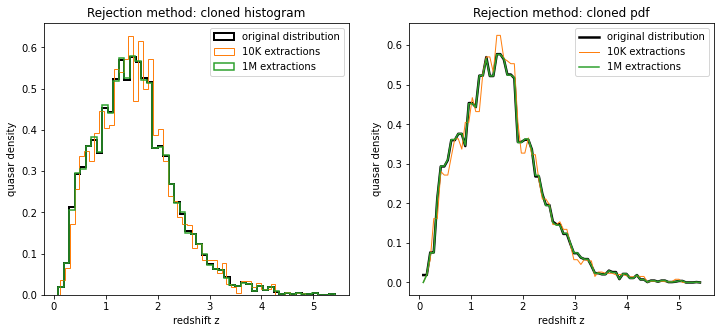

In [5]:
#extracting data with rejection method
x_sam = np.random.uniform(np.min(z), np.max(z), 10000)
y_sam = np.random.uniform(0, fmax, 10000)
good_x = x_sam[y_sam<function.pdf(x_sam)]
print(r'The accepted points represent the ', int(len(good_x)/10000*100), '% of the extractions' )

#.. with a larger dataset
x_sam_2 = np.random.uniform(np.min(z), np.max(z), 1000000)
y_sam_2 = np.random.uniform(0, fmax, 1000000)
good_x2 = x_sam_2[y_sam_2<function.pdf(x_sam_2)]
print('The accepted points represent the ', int(len(good_x2)/1000000*100), '% of the extractions' )

#interpolated pdf from the new extractions
f1_r = rv_histogram(np.histogram(good_x, density=True, bins=50))
f2_r = rv_histogram(np.histogram(good_x2, density=True, bins=50))

#plotting the results
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].hist(z, bins=50, density=True, histtype='step', color='black', lw=2, label ='original distribution')
ax[0].hist(good_x, bins = 50, density=True, histtype='step', lw=1, color='tab:orange', label = '10K extractions')
ax[0].hist(good_x2, bins = 50, density=True, histtype='step', lw=1.5, color='tab:green', label = '1M extractions')
ax[0].legend()
ax[0].set_xlabel('redshift z')
ax[0].set_ylabel('quasar density')
ax[0].set_title('Rejection method: cloned histogram')

ax[1].plot(xaxis, function.pdf(xaxis), color='black', lw=2.5, label ='original distribution')
ax[1].plot(xaxis, f1.pdf(xaxis), color='tab:orange', lw=1, label = '10K extractions')
ax[1].plot(xaxis, f2.pdf(xaxis), color='tab:green', lw=1.5, label = '1M extractions')
ax[1].legend()
ax[1].set_xlabel('redshift z')
ax[1].set_ylabel('quasar density')
ax[1].set_title('Rejection method: cloned pdf')

In general we can notice how with the extraction of more points the distribution becomes more similar to the original one. However, in the case of manual rejection method, we could see how only about 32% of the extracted points are actually considered, leading to more discrepancies between the cloned and the original pdf especially in the case of 10000 extractions (orange curve).

### Cloning with the inverse transform sampling method

Text(0.5, 1.0, 'Inverse tr. : cloned pdf')

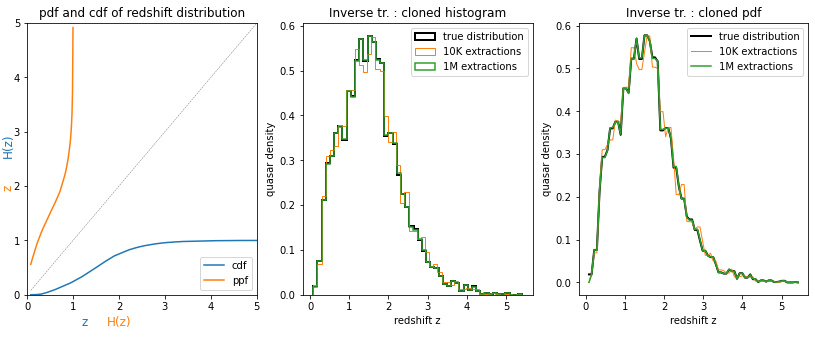

In [6]:
fig, ax = plt.subplots(1,3, figsize=(14,5))

xaxis1 = np.linspace(np.min(z), np.max(z), 500)

ax[0].plot(xaxis1, function.cdf(xaxis1), label='cdf') #cumulative distribution of the original interpolated pdf
ax[0].plot(xaxis1, function.ppf(xaxis1), label='ppf') #quantile distribution
ax[0].plot(xaxis1, xaxis1, ls='--', lw=0.5, c='grey')
ax[0].legend()
ax[0].set_xlim(0,5)
ax[0].set_ylim(0,5)

#uniform extraction and ppf value
x_inv = np.random.uniform(size=10000)
y_inv = function.ppf(x_inv)

x_inv1 = np.random.uniform(size=1000000)
y_inv1 = function.ppf(x_inv1)

#representing the results
ax[1].hist(z, bins = 50, density=True, histtype='step', lw=2, color='black', label = 'true distribution')
ax[1].hist(y_inv, bins = 50, density=True, histtype='step', lw=1, color='tab:orange', label = '10K extractions')
ax[1].hist(y_inv1, bins = 50, density=True, histtype='step', lw=1.5, color='tab:green', label = '1M extractions')

ax[2].plot(xaxis, function.pdf(xaxis), lw=2, color='black', label = 'true distribution')
ax[2].plot(xaxis, rv_histogram(np.histogram(y_inv, bins=50, density=True)).pdf(xaxis),
           lw=1, color='tab:orange', label = '10K extractions')
ax[2].plot(xaxis, rv_histogram(np.histogram(y_inv1, bins=50, density=True)).pdf(xaxis), 
           lw=1.5, color='tab:green', label = '1M extractions')

from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

xbox1 = TextArea("z", textprops=dict(color="tab:blue", size=12))
xbox2 = TextArea("H(z)", textprops=dict(color="tab:orange", size=12))
xbox = HPacker(children=[xbox1, xbox2], align="center", pad=0, sep=20)

anchored_xbox = AnchoredOffsetbox(loc=3, child=xbox, pad=-1.5, frameon=False, bbox_to_anchor=(0.3, -0.07), bbox_transform=ax[0].transAxes, borderpad=0.)
ax[0].add_artist(anchored_xbox)

ybox1 = TextArea("H(z)", textprops=dict(color="tab:blue", size=12,rotation='vertical'))
ybox2 = TextArea("z ", textprops=dict(color="tab:orange", size=12,rotation='vertical'))

ybox = VPacker(children=[ybox1, ybox2], align="center", pad=20, sep=20)

anchored_ybox = AnchoredOffsetbox(loc=8, child=ybox, pad=-2.5, frameon=False, bbox_to_anchor=(-0.08, 0.4), bbox_transform=ax[0].transAxes, borderpad=0.)

ax[0].add_artist(anchored_ybox)

for i in range(1,3):
    ax[i].set_xlabel('redshift z')
    ax[i].set_ylabel('quasar density')
    ax[i].legend()

ax[0].set_title('pdf and cdf of redshift distribution') 
ax[1].set_title('Inverse tr. : cloned histogram')
ax[2].set_title('Inverse tr. : cloned pdf')

### Conclusions

Text(0, 0.5, 'quasar density')

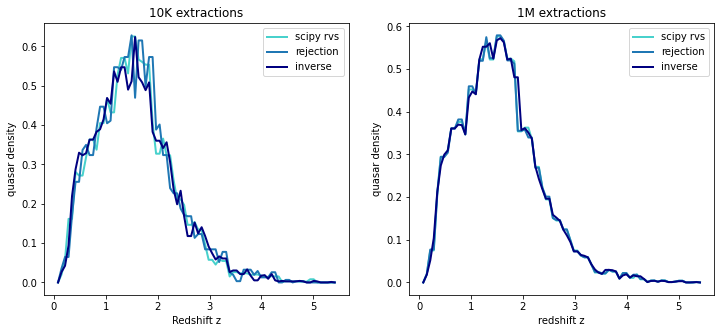

In [7]:
#comparing the three methods
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(xaxis, f1.pdf(xaxis), color='mediumturquoise', lw=2, label = 'scipy rvs')
ax[0].plot(xaxis, f1_r.pdf(xaxis), color='tab:blue', lw=2, label = 'rejection')
ax[0].plot(xaxis, rv_histogram(np.histogram(y_inv, bins=70, density=True)).pdf(xaxis),
           lw=2, color='navy', label = 'inverse')
ax[0].legend()
ax[0].set_title('10K extractions')
ax[0].set_xlabel('Redshift z')
ax[0].set_ylabel('quasar density')

ax[1].plot(xaxis, f2.pdf(xaxis), color='mediumturquoise', lw=2, label = 'scipy rvs')
ax[1].plot(xaxis, f2_r.pdf(xaxis), color='tab:blue', lw=2, label = 'rejection')
ax[1].plot(xaxis, rv_histogram(np.histogram(y_inv1, bins=70, density=True)).pdf(xaxis), 
           lw=2, color='navy', label = 'inverse')
ax[1].legend()
ax[1].set_title('1M extractions')
ax[1].set_xlabel('redshift z')
ax[1].set_ylabel('quasar density')

We could observe how with 10K extractions more 'perturbations' to the original distribution are present, while having a larger number of extracted points help us to better build the original distribution function reproducing all its features. Just a few differences could be noted in the rejection method due to the fact that even if we are extracting 1M points we are still using just about 30% of them.

### Theory VS Observations

In general we would expect quasars to be homogeneous per unit comoving volume. 

So the expected distribution of quasar can be found using the function differential_comoving_volume(z), that given cosmological parameters is returning the differential comoving volume per unit solid angle, per unit redshift. 

What we expect is therefore:

$$ \frac{\mathrm{dN}}{\mathrm{dV_c}} = \alpha = \mathrm{const}$$

$$ \frac{\mathrm{dN}}{\mathrm{dz}} = \frac{\mathrm{dN}}{\mathrm{dV_c}}\frac{\mathrm{dV_c}}{\mathrm{dz}} = \alpha \frac{\mathrm{dV_c}}{\mathrm{dz}} $$

$$\frac{\mathrm{dV_c}}{\mathrm{dz}} = 4 \pi \frac{\mathrm{dV_c}}{\mathrm{d}\Omega \mathrm{dz}} $$

Therefore if we want a normalized density distribution of quasars it should be:

$$\frac{\mathrm{dN}}{\mathrm{dz}} = \alpha \frac{4 \pi \frac{\mathrm{dV_c}}{\mathrm{d}\Omega \mathrm{dz}}}{\int 4 \pi \frac{\mathrm{dV_c}}{\mathrm{d}\Omega \mathrm{dz}} \mathrm{dz}} $$


In [8]:
import astropy
astropy.cosmology.Planck15
import warnings
warnings.filterwarnings("ignore")

In [9]:
z_axis = np.linspace(np.min(z), np.max(z), 100)
const_v = []

for i in z_axis:
    num = 4*np.pi*astropy.cosmology.Planck15.differential_comoving_volume(i).value #numerator = 4 pi dv/domega/dz
    const_v.append(num)

from scipy.interpolate import interp1d
const_v_f = interp1d(z_axis, const_v)   #I make a function out of some points

from scipy.integrate import quad
norm = quad(const_v_f, np.min(z), np.max(z))[0]  #denominator

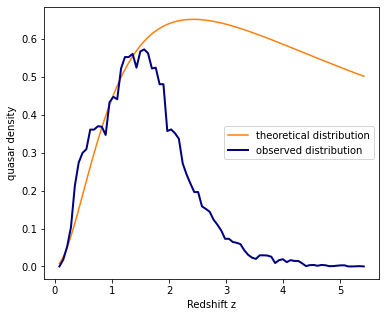

In [10]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(z_axis, 2.8*const_v_f(z_axis)/norm, color='tab:orange', label='theoretical distribution')  #alpha=2.8
ax.plot(xaxis, rv_histogram(np.histogram(y_inv1, bins=70, density=True)).pdf(xaxis), 
           lw=2, color='navy', label='observed distribution')
ax.set_xlabel('Redshift z')
ax.set_ylabel('quasar density')
ax.legend()

The fact that at high redshifts we observe less quasars than the predicted value could be due to an effect of our instruments. Telescopes are usually 'flux limited', therefore they could see a source only if its flux is bigger than a certain threshold value,  but the flux scales as the inverse of the squared distance! So more distant objects are more difficult to identify.